In [2]:
# Step 1: Install FFTW
!apt-get install libfftw3-dev
!apt-get install libfftw3-mpi-dev

# Step 2: Set paths for Dedalus installation
import os
import matplotlib.pyplot as plt
os.environ['MPI_INCLUDE_PATH'] = "/usr/lib/x86_64-linux-gnu/openmpi/include"
os.environ['MPI_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"
os.environ['FFTW_INCLUDE_PATH'] = "/usr/include"
os.environ['FFTW_LIBRARY_PATH'] = "/usr/lib/x86_64-linux-gnu"

# Step 3: Install Dedalus using pip
!pip3 install --no-cache http://github.com/dedalusproject/dedalus/zipball/d3/
#!pip install dedalus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  libfftw3-doc
The following NEW packages will be installed:
  libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3 libfftw3-single3
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 3,766 kB of archives.
After this operation, 21.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-quad3 amd64 3.3.7-1 [552 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-single3 amd64 3.3.7-1 [764 kB]
Get:4 http://ar

In [10]:
d3.SphereBasis(coords, (Nphi, Ntheta), radius=R, dealias=dealias, dtype=dtype)

2022-05-03 15:15:35,229 subsystems 0/1 INFO :: Building subproblem matrices 1/127 (~1%) Elapsed: 0s, Remaining: 2s, Rate: 6.5e+01/s
2022-05-03 15:15:35,297 subsystems 0/1 INFO :: Building subproblem matrices 13/127 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 1.6e+02/s
2022-05-03 15:15:35,373 subsystems 0/1 INFO :: Building subproblem matrices 26/127 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 1.6e+02/s
2022-05-03 15:15:35,447 subsystems 0/1 INFO :: Building subproblem matrices 39/127 (~31%) Elapsed: 0s, Remaining: 1s, Rate: 1.7e+02/s
2022-05-03 15:15:35,520 subsystems 0/1 INFO :: Building subproblem matrices 52/127 (~41%) Elapsed: 0s, Remaining: 0s, Rate: 1.7e+02/s
2022-05-03 15:15:35,594 subsystems 0/1 INFO :: Building subproblem matrices 65/127 (~51%) Elapsed: 0s, Remaining: 0s, Rate: 1.7e+02/s
2022-05-03 15:15:35,674 subsystems 0/1 INFO :: Building subproblem matrices 78/127 (~61%) Elapsed: 0s, Remaining: 0s, Rate: 1.7e+02/s
2022-05-03 15:15:35,752 subsystems 0/1 INFO :: Building subprobl

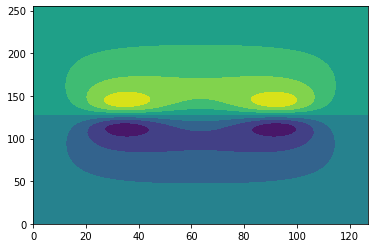

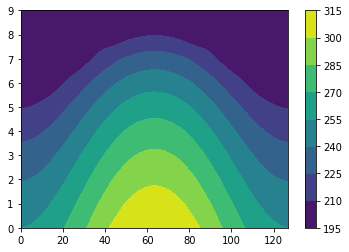

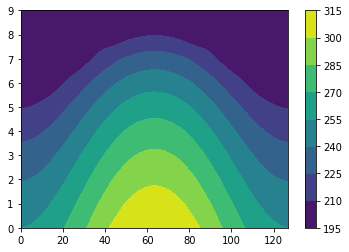

In [18]:
import numpy as np
import dedalus.public as d3
import logging
logger = logging.getLogger(__name__)


# Simulation units
meter           = 1 / 6.37122e6
hour            = 1
second          = hour / 3600

# Parameters
Nphi            = 256
Ntheta          = 128
dealias         = 3/2
R               = 6.37122e6 
Omega           = 7.292e-5 
nu              = 1e5 / 32**2 # Hyperdiffusion matched at ell=32
g               = 9.80616 
timestep        = 100 
stop_sim_time   = 360 * 3600
dtype           = np.float64

# Bases
#mesh            = [params.getint('Xn'),params.getint('Yn')]
coords          = d3.S2Coordinates('phi', 'theta')
dist            = d3.Distributor(coords, dtype=dtype)
basis           = d3.SphereBasis(coords, (Nphi, Ntheta), radius=R, dealias=dealias, dtype=dtype)




# Fields
u               = dist.VectorField(coords, name='u', bases=basis)
u_c             = dist.VectorField(coords, name='u_c', bases=basis)   
u_200           = dist.VectorField(coords, name='u_200', bases=basis)
u_800           = dist.VectorField(coords, name='u_800', bases=basis)
u_b             = dist.VectorField(coords, name='u_b', bases=basis)
u_init          = dist.VectorField(coords, name='u_init', bases=basis)
u_b_dt          = dist.VectorField(coords, name='u_b_dt', bases=basis)
psi_grad        = dist.VectorField(coords, name='psi_grad', bases=basis)
vor_b           = dist.Field(name='vor_b', bases=basis)
p_b             = dist.Field(name='p_b', bases=basis)
omega           = dist.Field(name='omega', bases=basis)
T_eq            = dist.Field(name='T_eq', bases=basis)
theta_b         = dist.Field(name='theta_b', bases=basis)
theta_b_eq      = dist.Field(name='theta_b_eq', bases=basis)
theta_c         = dist.Field(name='theta_c', bases=basis)
theta_c_eq      = dist.Field(name='theta_c_eq', bases=basis)
theta_200       = dist.Field(name='theta_200', bases=basis)
theta_800       = dist.Field(name='theta_800', bases=basis)
theta_200_eq    = dist.Field(name='theta_200_eq', bases=basis)
theta_800_eq    = dist.Field(name='theta_800_eq', bases=basis)
k_theta_200     = dist.Field(name='k_theta_200', bases=basis)  # thermal damping in the first layer
k_theta_800     = dist.Field(name='k_theta_800', bases=basis)  # thermal damping in the second layer
k_uv_200        = dist.Field(name='k_uv_200', bases=basis)    
k_uv_800        = dist.Field(name='k_uv_800', bases=basis)
psi_b           = dist.Field(name='psi_b', bases=basis)
vor_b           = dist.Field(name='vor_b', bases=basis)
h               = dist.Field(name='h', bases=basis)
tan_theta       = dist.Field(name='tan_theta', bases=basis)
cos_theta       = dist.Field(name='cos_theta', bases=basis)
zonal_unit      = dist.VectorField(coords, name='zonal_unit', bases=basis) # zonal direction unit vector
meridional_unit = dist.VectorField(coords, name='zonal_unit', bases=basis) # zonal direction unit vector

# Substitutions (parameters)
zcross          = lambda A: d3.MulCosine(d3.skew(A))


# Initial conditions: zonal jet
phi, theta      = dist.local_grids(basis)

lat             = np.pi / 2 - theta + 0*phi
umax            = 80 
cp              = 1004 
B               = 0.124
A               = 0.797

lat0            = np.pi / 7
lat1            = np.pi / 2 - lat0
en              = np.exp(-4 / (lat1 - lat0)**2)
jet1            = (lat0 <= lat) * (lat <= lat1) 
u_jet1          = umax / en * np.exp(1 / (lat[jet1] - lat0) / (lat[jet1] - lat1))

lat0            = -(np.pi / 7)
lat1            = -(np.pi / 2) - lat0
en              = np.exp(-4 / (lat1 - lat0)**2)
jet2            = (lat0 >= lat) * (lat >= lat1) 
u_jet2          = umax / en * np.exp(1 / (lat[jet2] - lat0) / (lat[jet2] - lat1))

#u_c['g'][0][jet1]       = u_jet1  # 0 = zonal component, 1 = meridional component
#u_c['g'][0][jet2]       = u_jet2  # 0 = zonal component, 1 = meridional component
#u_b['g'][0][jet1]       = u_jet1  # 0 = zonal component, 1 = meridional component
#u_b['g'][0][jet2]       = u_jet2  # 0 = zonal component, 1 = meridional component
u_init['g'][0][jet1]    = u_jet1  # for reference
u_init['g'][0][jet2]    = u_jet2  # for reference

# Initial conditions: perturbation
lat2             = np.pi / 4
#hpert         = 120 * meter * 10000000
alpha            = 1 / 3
beta             = 1 / 3
u_b['g'][1]     += 1/10000 * np.cos(lat) * np.exp(-((phi-np.pi)/alpha)**2) * np.exp(-((lat2-lat)/beta)**2)
lat2             = -np.pi / 4
u_b['g'][1]     += 1/10000 * np.cos(lat) * np.exp(-((phi-np.pi)/alpha)**2) * np.exp(-((lat2-lat)/beta)**2)
vor_b            = d3.div(d3.skew(u_b)).evaluate()


# Initial conditions: balanced wind
c       = dist.Field(name='c')
problem = d3.LBVP([psi_b, c], namespace=locals())
problem.add_equation("cp*B*lap(psi_b) + c = vor_b")
problem.add_equation("ave(psi_b) = 0")
solver = problem.build_solver()
solver.solve()

plt.figure()
plt.contourf(psi_b['g']/(cp*B))

# Initial conditions: balanced wind
c       = dist.Field(name='c')
problem = d3.LBVP([theta_b, c], namespace=locals())
problem.add_equation("cp*B*lap(theta_b) + c = - div(dot(u_b, grad(u_b)) + 2*Omega*zcross(u_b))")
problem.add_equation("ave(theta_b)          = 0")
solver = problem.build_solver()
solver.solve()



#u_init['g'][0]          = u_b     # for reference

tan_theta['g']          = np.tan(lat)
cos_theta['g']          = np.cos(lat)
zonal_unit['g'][0]      = 1
zonal_unit['g'][1]      = 0
meridional_unit['g'][0] = 0
meridional_unit['g'][1] = 1


# define radiative equilibrium profile
p                 = np.arange(1000,0,-100)
PP,yy             = np.meshgrid(p,theta.T) 
Teq               = np.zeros((np.shape(lat)[1],np.shape(p)[0]))
Teq2              = np.ones((np.shape(lat)[1],np.shape(p)[0]))*200
Teq               = (315 - 60*np.cos(yy)**2-10*np.log(PP/1000)*np.sin(yy)**2)*(PP/1000)**(2/7)
Teq[Teq<200]      = 200
plt.figure()
cs=plt.contourf(Teq.T)
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(Teq.T)
plt.colorbar(cs)

# damping coefficient (see https://www.gfdl.noaa.gov/bibliography/related_files/ih9401.pdf for details)
ka                = 1/(40*86400) # for free troposphere (above 700hPa)  e-folding time = 40 days
ks                = 1/(4**86400)  # for near surface (below 700hPa)     e-folding time =  4 days
kf                = 1/86400    # surface friction 
k2                = (ks - ka)*((PP/1000-0.7)/(1-0.7))*np.sin(yy)**4 
k2[k2<0]          = 0
k_T               = ka+k2
k_v               = kf*(PP/1000-0.7)/(1-0.7)
k_v[k_v<0]        = 0 
k_theta_200['g']  = k_T[:,-2]
k_theta_800['g']  = k_T[:,2]
k_uv_200['g']     = k_v[:,-2]
k_uv_800['g']     = k_v[:,2]

# define radiative equilibrium profile 
theta_eq          = Teq*(1000/PP)**(2/7)
theta_200_eq['g'] = theta_eq[:,-2]
theta_800_eq['g'] = theta_eq[:,2]
theta_200['g']    = theta_eq[:,-2]*0
theta_800['g']    = theta_eq[:,2]*0
theta_b_eq['g']   = (theta_eq[:,-2]+theta_eq[:,2])/2
theta_c_eq['g']   = (theta_eq[:,-2]-theta_eq[:,2])/2
#theta_b['g']      = (theta_eq[:,-2]+theta_eq[:,2])/10
#theta_c['g']      = (theta_eq[:,-2]-theta_eq[:,2])/10
#vor_b['g']        = d3.div(d3.skew(u_b)).evaluate()['g']



problem = d3.LBVP([omega], namespace=locals())
problem.add_equation("omega  = -div(u_c)")
solver = problem.build_solver()
solver.solve()

# Initial conditions: perturbation
lat2          = np.pi / 4
hpert         = 120 * meter * 100000
alpha         = 1 / 3
beta          = 1 / 15
theta_b['g'] += 10 * np.cos(lat) * np.exp(-((phi-np.pi)/alpha)**2) * np.exp(-((lat2-lat)/beta)**2)
lat2          = -np.pi / 4
theta_b['g'] += -10 * np.cos(lat) * np.exp(-((phi-np.pi)/alpha)**2) * np.exp(-((lat2-lat)/beta)**2)


# Problem
c       = dist.Field(name='c')
problem = d3.IVP([u_c, u_b, theta_c, theta_b, omega,  c, p_b], namespace=locals())
#problem.add_equation("dt(u) + nu*lap(lap(u)) + g*grad(h) + 2*Omega*zcross(u) = - dot(u, grad(u))")
#problem.substitutions['Lap(A)']   = 'div(skew(grad(A)))'
problem.add_equation("dt(u_c)      = -nu*lap(lap(u_c)) -dot(u_c,grad(u_b)) -dot(u_b,grad(u_c)) -cp*B*grad(theta_b)            -2*Omega*zcross(u_c) - tan_theta/R*dot(zonal_unit,u_b)*skew(u_c)-tan_theta/R*dot(zonal_unit,u_c)*skew(u_b)-k_uv_800*u_c")
problem.add_equation("div(u_b)  + c = 0" )
problem.add_equation("dt(u_b)      = -nu*lap(lap(u_b)) -dot(u_b,grad(u_b)) -dot(u_c,grad(u_c)) -cp*B*grad(p_b)                -2*Omega*zcross(u_b) - tan_theta/R*dot(zonal_unit,u_b)*skew(u_b)-tan_theta/R*dot(zonal_unit,u_c)*skew(u_c)-k_uv_800*u_b")
problem.add_equation("ave(p_b)     = 0")
#problem.add_equation("dt(u_c)     = -nu*lap(lap(u_c)) -dot(u_c,grad(u_b)) -dot(u_b,grad(u_c)) -cp*B*grad(theta_b)            -2*Omega*zcross(u_c) -k_uv_800*u_c")
#problem.add_equation("dt(u_b)     = -nu*lap(lap(u_b)) -dot(u_b,grad(u_b)) -dot(u_c,grad(u_c)) -cp*B*grad(theta_b-theta_c)    -2*Omega*zcross(u_b) -k_uv_800*u_b")
#problem.add_equation("dt(vor_b)   = 2*Omega*cos_theta/R*dot(meridional_unit,u_b) + div(skew(u_b_dt)) ")
#problem.add_equation("Lap(psi_b) - vor_b = 0")
# Auxiliary equations defining the first-order reduction
#problem.add_equation("lap(psi_b)    = vor_b" )
#problem.add_equation("cp*B*lap(p_b) = div(-nu*lap(lap(u_b)) -dot(u_b,grad(u_b)) -dot(u_c,grad(u_c))-2*Omega*zcross(u_b) - tan_theta/R*dot(zonal_unit,u_b)*skew(u_b)-tan_theta/R*dot(zonal_unit,u_c)*skew(u_c)-k_uv_800*u_b)")
#problem.add_equation("u_b           = skew(grad(psi_b))")
#problem.add_equation("u_b        = skew(grad(psi_b))")
#problem.add_equation("dt(theta_b) =               -div(u_b*theta_b)-div(u_c*theta_c)-(k_theta_200*((theta_b+theta_c)-theta_200_eq)+k_theta_800*((theta_b-theta_c)-theta_800_eq))/2")
#problem.add_equation("dt(theta_b) = -div(u_b*theta_b_eq)-div(u_b*theta_b)-div(u_c*theta_c)-(k_theta_200+k_theta_800)/2*(theta_b-(theta_200_eq+theta_800_eq)/2)")
problem.add_equation("omega       = -div(u_c)")
problem.add_equation("dt(theta_b) =                -div(u_b*theta_b_eq)-div(u_c*theta_c_eq)-div(u_b*theta_b)-div(u_c*theta_c)-(k_theta_800+k_theta_200)/2*theta_b")
problem.add_equation("dt(theta_c) = -omega*theta_b                                         -div(u_b*theta_c)-div(u_c*theta_b)-(k_theta_800+k_theta_200)/2*theta_c")
#problem.add_equation("u_init      = u_init + 0")
#problem.add_equation("dt(h) + nu*lap(lap(h)) + H*div(u) = - div(h*u)")



TypeError: ignored

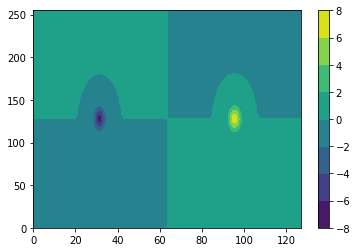

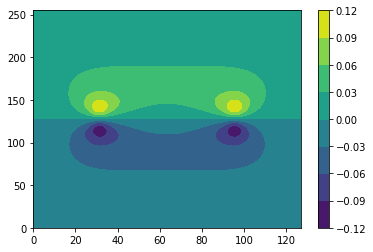

In [ ]:
plt.figure()
cs=plt.contourf(theta_b['g'])
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(psi_b['g'])
plt.colorbar(cs)

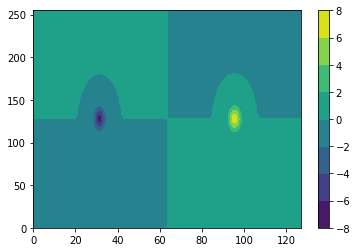

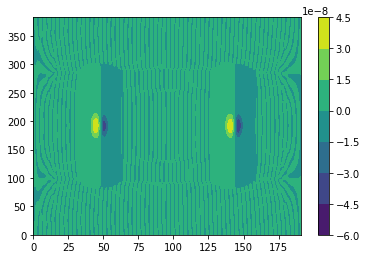

In [ ]:
plt.figure()
cs=plt.contourf(theta_b['g'])
plt.colorbar(cs)


plt.figure()
cs=plt.contourf((-d3.div(u_b*theta_b_eq)-d3.div(u_b*theta_b)).evaluate()['g'])
plt.colorbar(cs)

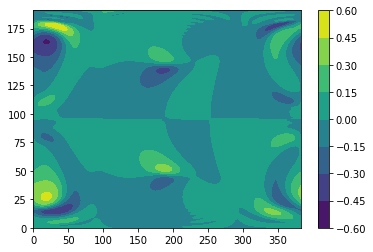

In [ ]:
plt.figure()
cs=plt.contourf(u_b['g'][0].T)
plt.colorbar(cs)


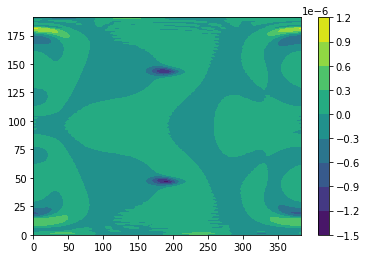

In [ ]:
plt.figure()
cs=plt.contourf(-d3.div(d3.skew(u_b)).evaluate()['g'].T)
plt.colorbar(cs)

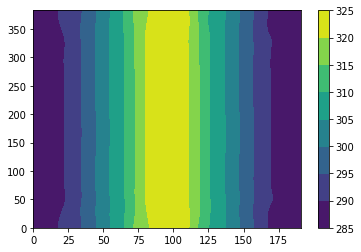

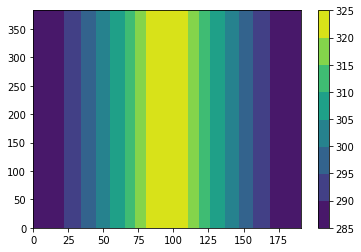

In [ ]:
plt.figure()
cs=plt.contourf(theta_b['g']+theta_b_eq['g'])
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(((theta_200_eq+theta_800_eq)/2).evaluate()['g'])
plt.colorbar(cs)

In [19]:
# Solver
solver = problem.build_solver(d3.RK222)
solver.stop_sim_time = stop_sim_time

# Analysis
snapshots = solver.evaluator.add_file_handler('snapshots', sim_dt=3600, max_writes=10)
snapshots.add_task(theta_c, name='theta_c')
snapshots.add_task(-d3.div(d3.skew(u_c)), name='vorticity')

# Main loop
try:
    logger.info('Starting main loop')
    while solver.proceed:
        solver.step(timestep)
        if (solver.iteration-1) % 10 == 0:
            logger.info('Iteration=%i, Time=%e, dt=%e' %(solver.iteration, solver.sim_time, timestep))
except:
    logger.error('Exception raised, triggering end of main loop.')
    raise
finally:
    solver.log_stats()


2022-05-03 15:15:51,675 subsystems 0/1 INFO :: Building subproblem matrices 1/127 (~1%) Elapsed: 0s, Remaining: 3s, Rate: 4.5e+01/s
2022-05-03 15:15:51,800 subsystems 0/1 INFO :: Building subproblem matrices 13/127 (~10%) Elapsed: 0s, Remaining: 1s, Rate: 8.8e+01/s
2022-05-03 15:15:51,920 subsystems 0/1 INFO :: Building subproblem matrices 26/127 (~20%) Elapsed: 0s, Remaining: 1s, Rate: 9.7e+01/s
2022-05-03 15:15:52,040 subsystems 0/1 INFO :: Building subproblem matrices 39/127 (~31%) Elapsed: 0s, Remaining: 1s, Rate: 1.0e+02/s
2022-05-03 15:15:52,169 subsystems 0/1 INFO :: Building subproblem matrices 52/127 (~41%) Elapsed: 1s, Remaining: 1s, Rate: 1.0e+02/s
2022-05-03 15:15:52,299 subsystems 0/1 INFO :: Building subproblem matrices 65/127 (~51%) Elapsed: 1s, Remaining: 1s, Rate: 1.0e+02/s
2022-05-03 15:15:52,419 subsystems 0/1 INFO :: Building subproblem matrices 78/127 (~61%) Elapsed: 1s, Remaining: 0s, Rate: 1.0e+02/s
2022-05-03 15:15:52,552 subsystems 0/1 INFO :: Building subprobl

RuntimeError: ignored

In [ ]:
hour

1

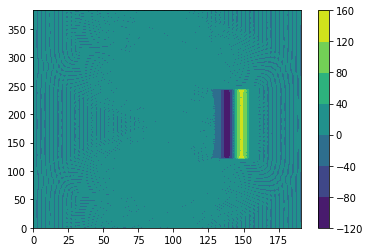

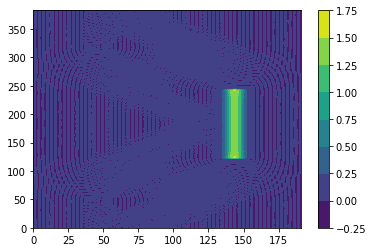

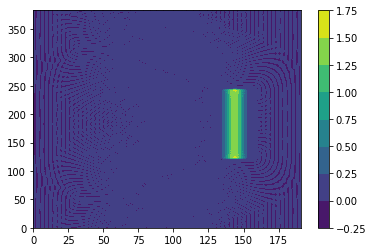

In [ ]:
plt.figure()
cs=plt.contourf(d3.div(u_c*theta_b).evaluate()['g'])
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(d3.div(u_c*theta_b).evaluate()['g']-(d3.div(u_c)*theta_b).evaluate()['g'])
plt.colorbar(cs)

plt.figure()
cs=plt.contourf((d3.dot(u_c,d3.grad(theta_b))).evaluate()['g'])
plt.colorbar(cs)

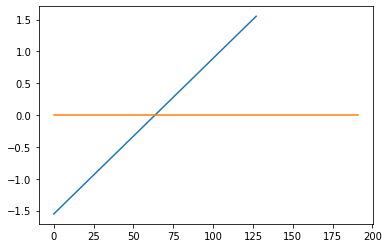

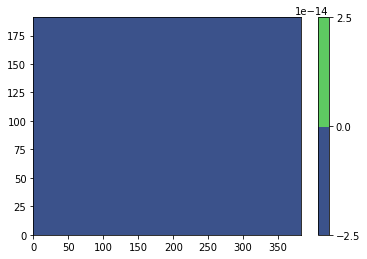

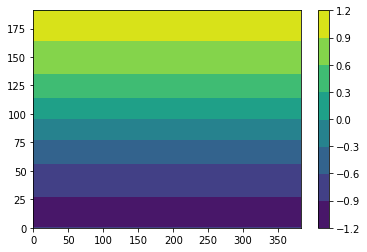

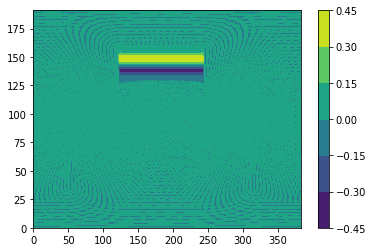

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(lat[0,:].T)
plt.plot(u['g'][0][200,:].T)
plt.figure()
cs=plt.contourf(u['g'][0].T)
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(zcross(u).evaluate()['g'][0].T)
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(-d3.div(d3.skew(u_c)).evaluate()['g'].T)
plt.colorbar(cs)


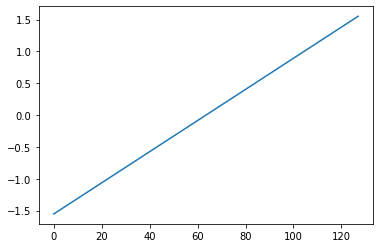

In [ ]:
#cs=plt.contourf(lat.T)
#plt.colorbar(cs)
plt.plot(np.pi/2-theta.T)

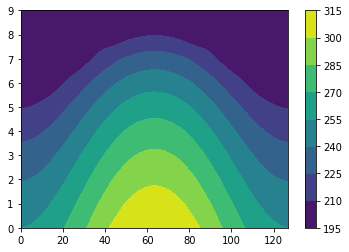

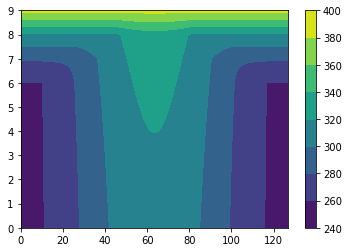

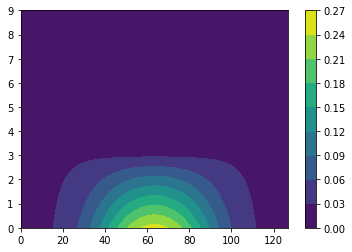

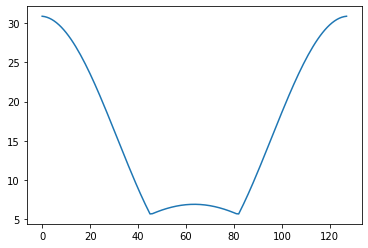

In [ ]:
import matplotlib.pyplot as plt
# equilibrium temperature profile 
p         = np.arange(1000,0,-100)
PP,yy     = np.meshgrid(p,theta.T) 
Teq       = np.zeros((np.shape(lat)[1],np.shape(p)[0]))
Teq2      = np.ones((np.shape(lat)[1],np.shape(p)[0]))*200
Teq       = (315 - 60*np.cos(yy)**2-10*np.log(PP/1000)*np.sin(yy)**2)*(PP/1000)**(2/7)
Teq[Teq<200] = 200
plt.figure()
cs=plt.contourf(Teq.T)
plt.colorbar(cs)
# damping coefficient
ka        = 1/40
ks        = 1/4
kf        = 1
k2        = (ks - ka)*((PP/1000-0.7)/(1-0.7))*np.sin(yy)**4
k2[k2<0]  = 0
k_T       = ka+k2
k_v        = kf*(PP/1000-0.7)/(1-0.7)
k_v[k_v<0] = 0 

# 
theta_eq     = Teq*(1000/PP)**(2/7)
theta_eq_200 = theta_eq[:,-2]
theta_eq_800 = theta_eq[:,2]


plt.figure()
cs=plt.contourf(theta_eq.T)
plt.colorbar(cs)
plt.figure()
cs=plt.contourf(k_T.T)
plt.colorbar(cs)
np.shape(theta_eq)
plt.figure()
#plt.plot(theta_eq_200)
#plt.plot((theta_eq_800+theta_eq_200)/2)
plt.plot((theta_eq_200-theta_eq_800)/2)

#T_eq['g'] = 315 - 60*np.cos(lat)**2-10

In [ ]:
np.shape(theta_b['g'])

(256, 128)

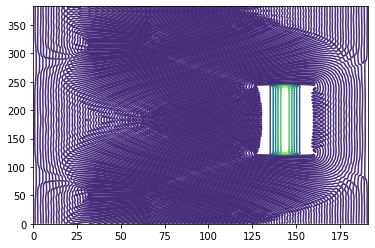

In [ ]:
import matplotlib.pyplot as plt
plt.contour(u['g'][1])

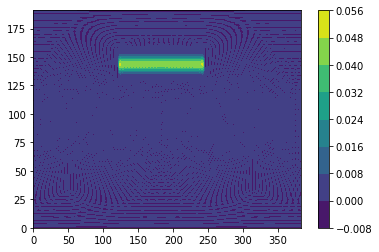

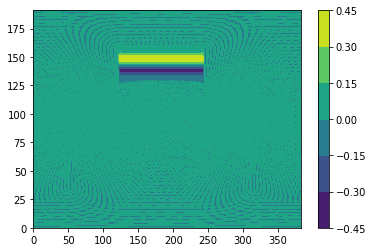

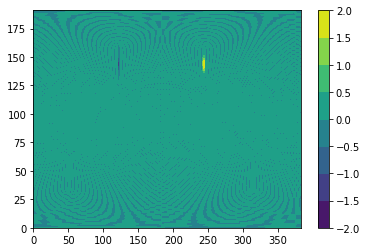

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
cs=plt.contourf(u['g'][1].T)
plt.colorbar(cs)

plt.figure()
cs=plt.contourf(d3.div(u).evaluate()['g'].T)
plt.colorbar(cs)

plt.figure()
#cs=plt.contourf((d3.skew(u)).evaluate()['g'][1].T)
cs=plt.contourf(-d3.div(d3.skew(u)).evaluate()['g'].T)
plt.colorbar(cs)
#d3.div(d3.skew(u)).evaluate()['g']

In [ ]:
theta

array([[3.12287811, 3.09863496, 3.07424864, 3.04982997, 3.02539903,
        3.00096216, 2.97652197, 2.95207974, 2.92763616, 2.90319165,
        2.87874647, 2.85430079, 2.82985472, 2.80540836, 2.78096176,
        2.75651496, 2.732068  , 2.70762092, 2.68317372, 2.65872643,
        2.63427906, 2.60983161, 2.58538411, 2.56093656, 2.53648896,
        2.51204132, 2.48759365, 2.46314594, 2.4386982 , 2.41425044,
        2.38980266, 2.36535485, 2.34090703, 2.31645919, 2.29201133,
        2.26756346, 2.24311558, 2.21866768, 2.19421978, 2.16977186,
        2.14532393, 2.120876  , 2.09642806, 2.07198011, 2.04753216,
        2.0230842 , 1.99863623, 1.97418826, 1.94974029, 1.92529231,
        1.90084432, 1.87639634, 1.85194835, 1.82750035, 1.80305236,
        1.77860436, 1.75415636, 1.72970836, 1.70526036, 1.68081235,
        1.65636435, 1.63191634, 1.60746834, 1.58302033, 1.55857232,
        1.53412432, 1.50967631, 1.4852283 , 1.4607803 , 1.4363323 ,
        1.41188429, 1.38743629, 1.36298829, 1.33

In [ ]:
# Fields
u = dist.VectorField(coords, name='u', bases=basis)
h = dist.Field(name='h', bases=basis)

# Substitutions
zcross = lambda A: d3.MulCosine(d3.skew(A))

# Initial conditions: zonal jet
phi, theta      = dist.local_grids(basis)
lat             = np.pi / 2 - theta + 0*phi
umax            = 80 * meter / second
lat0            = np.pi / 7
lat1            = np.pi / 2 - lat0
en              = np.exp(-4 / (lat1 - lat0)**2)
jet             = (lat0 <= lat) * (lat <= lat1)
u_jet           = umax / en * np.exp(1 / (lat[jet] - lat0) / (lat[jet] - lat1))
u['g'][0][jet]  = u_jet  #g stands for grid and c stands for coefficient 

In [ ]:
import matplotlib.pyplot as plt

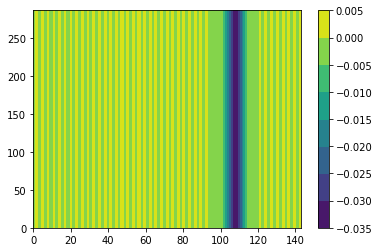

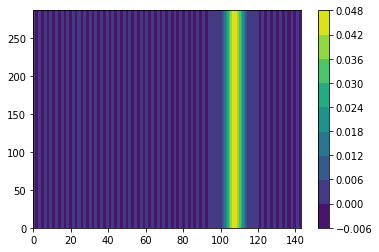

In [ ]:
aa = zcross(u).evaluate()
plt.figure()
cs=plt.contourf(aa['g'][1])
plt.colorbar(cs)
plt.figure()
cs=plt.contourf(u['g'][0])
plt.colorbar(cs)

In [ ]:
zcross = lambda A: d3.MulCosine(d3.skew(A))

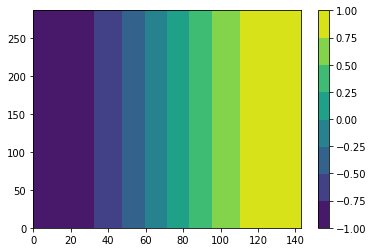

In [ ]:
h['g'] = 1
plt.figure()
cs=plt.contourf(d3.MulCosine(h).evaluate()['g'])
plt.colorbar(cs)